In [23]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv("Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Dataset is about the startup and their profit earned.

Dataset Contains 50 Responses with 5 Features

Here Profit is Target

In [26]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Variance is very less; There is Normal Dstribution between features.

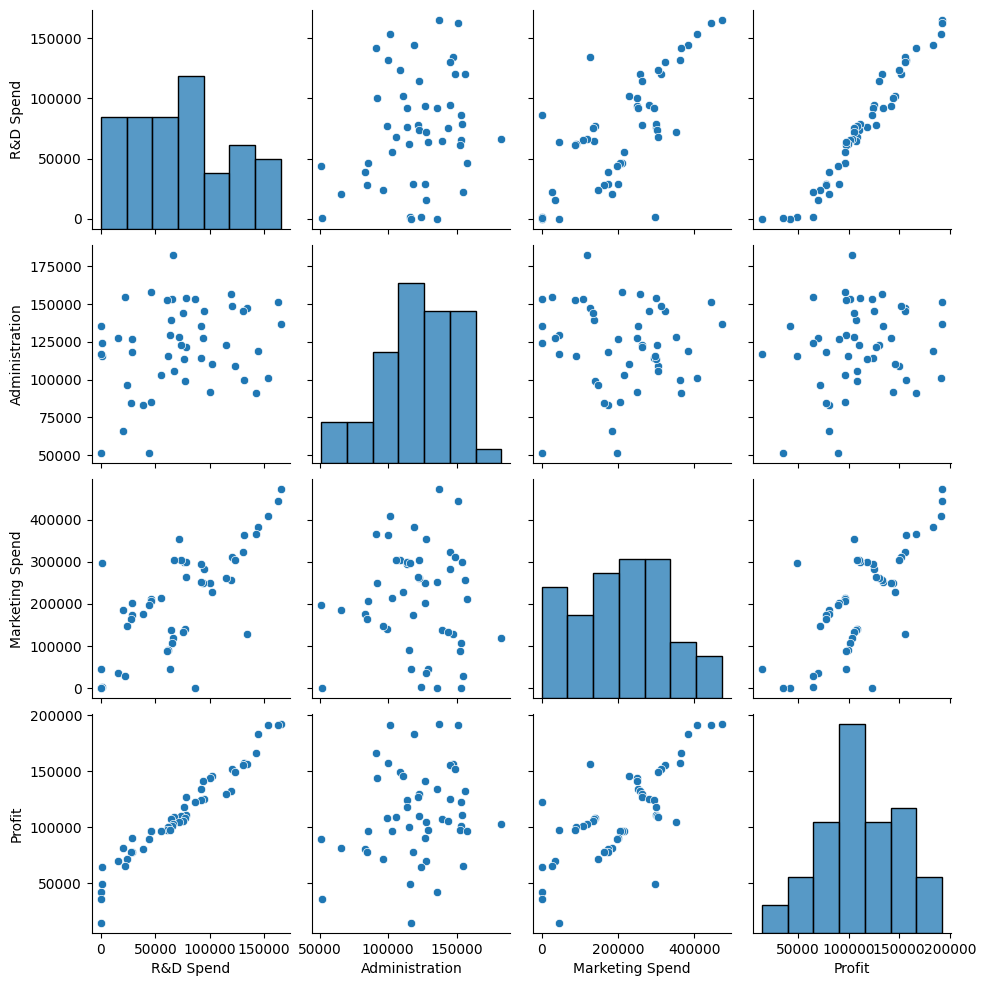

In [27]:
sns.pairplot(df)

**Profit & R&D has good relation**

In [28]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

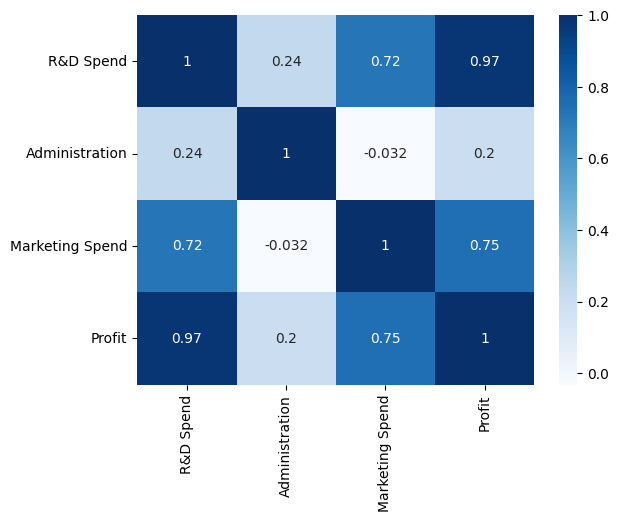

In [29]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

There is multicolinearity in data.

Marketing spend and R&D spend has 72% co-relation.

In [30]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
x=df.iloc[:,:-2]
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [32]:
y=df.iloc[:,-1]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [34]:
from sklearn.neighbors import KNeighborsRegressor 
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [35]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
ac=r2_score(ytest,ypred)

print(f"MAE:{mae}\nMSE:{mse}\nRMSE:{rmse}\nAccuracy:{ac}")

MAE:10447.029400000007
MSE:143358751.24623257
RMSE:11973.251490143877
Accuracy:0.8879039067653898


In [36]:
train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)

print(f"Training Accuracy:{train}\nTesting Accuracy:{test}")

Training Accuracy:0.8328876309194482
Testing Accuracy:0.8879039067653898


Model is having underfitting (High Bais & Low Variance)

**Hyperparameter Tunning**

In [37]:
trainac=[]
testac=[]

for i in range(1,31):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)
    trainac.append(train)
    testac.append(test)

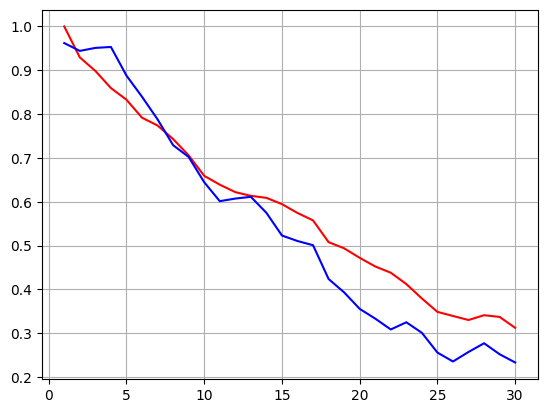

In [38]:
plt.plot(range(1,31),trainac,color="red")
plt.plot(range(1,31),testac,color="blue")
plt.grid()

Intersection is at K= 2 -3 

So recreate the model by using k as 2

In [39]:
from sklearn.neighbors import KNeighborsRegressor 
knn=KNeighborsRegressor(n_neighbors=2)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
ac=r2_score(ytest,ypred)

print(f"MAE:{mae}\nMSE:{mse}\nRMSE:{rmse}\nAccuracy:{ac}")

train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)

print(f"Training Accuracy:{train}\nTesting Accuracy:{test}")

MAE:6226.290500000003
MSE:71256030.89139262
RMSE:8441.32873968267
Accuracy:0.9442829781028822
Training Accuracy:0.9294234963316742
Testing Accuracy:0.9442829781028822


This is the Best Fit with low bais and low variance.

**Predicting New Observation**

In [40]:
def profit():
    rnd=float(input("Enter R & D Amount:"))
    ad=float(input("Enter Adm.Amount:"))
    ms=float(input("Enter Marketing Spend"))
    newob=[[rnd,ad,ms]]
    yp=knn.predict(newob)[0]
    print(f"The profit will be of $ {yp:.2f}")

In [41]:
profit()

Enter R & D Amount:100000
Enter Adm.Amount:25000
Enter Marketing Spend50000
The profit will be of $ 98682.71
